# PART 6B: 2019 - SINGAPORE'S WARMEST YEAR ON RECORD

Temperature records tumbled across the globe in 2019, with scientists declaring the year to be the second-warmest since records began in 1880. [2010 - 2019 was also the warmest decade in modern times](https://public.wmo.int/en/media/press-release/wmo-confirms-2019-second-hottest-year-record).

In Singapore, the annual mean temperature hit 28.44°C in 2019, making it the warmest year on record. Singapore's [National Environment Agency declared 2019 as a "joint warmest year" with 2016](https://www.nea.gov.sg/media/news/news/index/2019-is-singapore-s-joint-warmest-year-on-record) due to a decimal rounding issue. 2010 - 2019 was also the warmest decade on record in Singapore.

If you stick to 2 decimal places in the calculations, the annual mean temperature in 2016 was 28.43°C. Sure, it's just a 0.01°C difference. But to paraphrase Hemingway, disasters happen "gradually, and then suddenly". 

In this notebook, I'll examine the weather in 2019 and compare it with the preceding years. Data preparation was dealt with in notebook 6.0.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams["figure.dpi"] = 300
%matplotlib inline
%config InlineBackend.figure_format ='retina'

# 1. OVERVIEW

In [2]:
# This csv file was prepared in notebook 6.0
# Data comprises Singapore weather data from Jan 1 1983 - Dec 31 2019

weather = pd.read_csv('../data/weather_1983_2019_full.csv')

In [3]:
weather.describe()

Year         Month       Quarter           Day  \
count  13514.000000  13514.000000  13514.000000  13514.000000   
mean    2000.999334      6.523013      2.508584     15.729392   
std       10.677276      3.448808      1.117115      8.800314   
min     1983.000000      1.000000      1.000000      1.000000   
25%     1992.000000      4.000000      2.000000      8.000000   
50%     2001.000000      7.000000      3.000000     16.000000   
75%     2010.000000     10.000000      4.000000     23.000000   
max     2019.000000     12.000000      4.000000     31.000000   

       Daily Rainfall Total (mm)  Mean Temperature (°C)  \
count               13514.000000           13514.000000   
mean                    5.830132              27.666886   
std                    14.448264               1.176403   
min                     0.000000              22.800000   
25%                     0.000000              26.900000   
50%                     0.000000              27.700000   
75%                     4.400000              28.600000   
max                   216.200000              30.900000   

       Maximum Temperature (°C)  Minimum Temperature (°C)  \
count              13514.000000              13514.000000   
mean                  31.519476                 24.904077   
std                    1.573580                  1.267669   
min                   23.600000                 20.200000   
25%                   30.800000                 24.000000   
50%                   31.800000                 24.900000   
75%                   32.500000                 25.800000   
max                   36.000000                 29.100000   

       Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
count            13514.000000           13514.000000  
mean                 7.450822              34.043650  
std                  3.475324               8.027471  
min                  0.200000               4.700000  
25%                  4.800000              28.800000  
50%                  6.800000              33.100000  
75%                  9.700000              38.200000  
max                 22.200000              90.700000

## 1.1 NO SINGLE-DAY RECORDS BROKEN

In [4]:
weather2019 = weather[weather["Year"] == 2019]

In [5]:
weather2019.describe()

Year       Month     Quarter         Day  Daily Rainfall Total (mm)  \
count   365.0  365.000000  365.000000  365.000000                 365.000000   
mean   2019.0    6.526027    2.509589   15.720548                   3.746575   
std       0.0    3.452584    1.118300    8.808321                  11.401418   
min    2019.0    1.000000    1.000000    1.000000                   0.000000   
25%    2019.0    4.000000    2.000000    8.000000                   0.000000   
50%    2019.0    7.000000    3.000000   16.000000                   0.000000   
75%    2019.0   10.000000    4.000000   23.000000                   0.600000   
max    2019.0   12.000000    4.000000   31.000000                  92.200000   

       Mean Temperature (°C)  Maximum Temperature (°C)  \
count             365.000000                365.000000   
mean               28.443014                 32.298082   
std                 1.057437                  1.452630   
min                24.100000                 25.200000   
25%                27.900000                 31.700000   
50%                28.600000                 32.600000   
75%                29.300000                 33.200000   
max                30.700000                 34.800000   

       Minimum Temperature (°C)  Mean Wind Speed (km/h)  Max Wind Speed (km/h)  
count                365.000000              365.000000             365.000000  
mean                  25.918356               10.292329              33.609315  
std                    1.280783                3.553700               5.757004  
min                   21.900000                4.300000              18.400000  
25%                   25.200000                7.200000              29.500000  
50%                   26.000000                9.700000              33.500000  
75%                   26.900000               13.300000              37.100000  
max                   28.400000               20.200000              57.600000

## ANALYSIS:

Comparing the "max" entries in 2019 weather Vs the entire 1983-2019 dataset, it is clear that the weather in 2019 did not break any single-day record.

For instance, the highest maximum daily temperature in the last 37 years - 36°C - was recorded on March 26 1998. The highest average daily temperature - 30.9°C - was recorded on two days in 1998 - May 21 and May 28. 

But **overall**, 2019 was clearly warmer than the preceding years. Let's take a closer look.

## 1.2 2019 COMPARED TO PRECEDING YEARS (WARMER DAYS AND NIGHTS)

It's easier to visualise the data via a series of group-by functions, and then concating the new DFs.

In [6]:
# Avg daily temp
weather_mean = (
    weather.groupby("Year")["Mean Temperature (°C)"].mean().sort_index(ascending=True)
)

weather_mean = pd.DataFrame(
    weather_mean.reset_index().rename(
        columns={"index": "Year", 0: "Daily Average Temperature (°C)"}
    )
)

weather_mean.columns = ["Year", "Daily Average Temperature (°C)"]


# Min daily temp
weather_min = (
    weather.groupby("Year")["Minimum Temperature (°C)"].mean().sort_index(ascending=True)
)

weather_min = pd.DataFrame(
    weather_min.reset_index().rename(
        columns={"index": "Year", 0: "Daily Minimum Temperature (°C)"}
    )
)

weather_min.columns = ["Year", "Daily Minimum Temperature (°C)"]


#Max daily temp
weather_max = (
    weather.groupby("Year")["Maximum Temperature (°C)"].mean().sort_index(ascending=True)
)

weather_max = pd.DataFrame(
    weather_max.reset_index().rename(
        columns={"index": "Year", 0: "Daily Max Temperature (°C)"}
    )
)

weather_max.columns = ["Year", "Daily Max Temperature (°C)"]

In [7]:
weather_rank = pd.merge(left=weather_mean, right=weather_min, how="outer", on="Year", sort=True)

weather_rank = pd.merge(left=weather_rank, right=weather_max, how="outer", on="Year", sort=True)

weather_rank = weather_rank.sort_values(by="Daily Average Temperature (°C)", ascending=False)

In [8]:
# Years ranked by warmest annual mean temperature
# 2019 had the highest daily mean temperature and daily minimum temperature

weather_rank

Year  Daily Average Temperature (°C)  Daily Minimum Temperature (°C)  \
36  2019                       28.443014                       25.918356   
33  2016                       28.429235                       25.794536   
15  1998                       28.305479                       25.298082   
14  1997                       28.247671                       25.312055   
32  2015                       28.241370                       25.779726   
19  2002                       28.088219                       25.252877   
27  2010                       28.085479                       24.873151   
22  2005                       28.007397                       25.102466   
26  2009                       27.927671                       25.030411   
31  2014                       27.918356                       25.267123   
35  2018                       27.885205                       25.355616   
21  2004                       27.853825                       25.112022   
20  2003                       27.765753                       25.073699   
23  2006                       27.743014                       25.050411   
34  2017                       27.695342                       25.247671   
0   1983                       27.655068                       24.860274   
30  2013                       27.654795                       24.975616   
18  2001                       27.615616                       24.871781   
11  1994                       27.597260                       24.727671   
7   1990                       27.593151                       24.801370   
12  1995                       27.583836                       24.727123   
28  2011                       27.569041                       24.727671   
29  2012                       27.542623                       24.977596   
24  2007                       27.538630                       24.784110   
13  1996                       27.501639                       24.540984   
16  1999                       27.492603                       24.689315   
17  2000                       27.483060                       24.682787   
25  2008                       27.474863                       24.749727   
8   1991                       27.444384                       24.667397   
10  1993                       27.421644                       24.607397   
4   1987                       27.374247                       24.744932   
9   1992                       27.358470                       24.384699   
5   1988                       27.228415                       24.633607   
2   1985                       27.114247                       24.263836   
3   1986                       27.106575                       24.404110   
6   1989                       26.926575                       24.123836   
1   1984                       26.764754                       24.040164   

    Daily Max Temperature (°C)  
36                   32.298082  
33                   31.982514  
15                   32.101918  
14                   32.371781  
32                   31.867123  
19                   32.050685  
27                   31.910959  
22                   31.851233  
26                   31.739178  
31                   31.587945  
35                   31.599452  
21                   31.717760  
20                   31.435890  
23                   31.482740  
34                   31.148493  
0                    31.745753  
30                   31.301370  
18                   31.362192  
11                   31.354521  
7                    31.830411  
12                   31.314247  
28                   31.175890  
29                   31.190437  
24                   31.104932  
13                   31.362295  
16                   31.341644  
17                   31.414208  
25                   31.080601  
8                    31.517808  
10                   31.281918  
4                    31.507671  
9                    31.481421  
5                    31.29

# NOTE: 

* 5 of the years in the last decade were in the top 10 warmest: 2019, 2016, 2015, 2010 and 2014.

* In 2019, the annual mean for the daily minimum temperature was also the highest on record - 25.91°C - suggesting that Singapore also experienced warmer nights.

In [9]:
# Outputting the CSV file to Google Sheets for faster visualisation

#weather_rank.to_csv('../data/weather_rank.csv', index=False)

## 1.3 VISUALISING SINGAPORE'S WARMEST YEAR ON RECORD

The 2 charts below were made via Google Sheets. Detailed anontation and axis/data labeling on matplotlib is unfortunately too painful and time consuming a process....

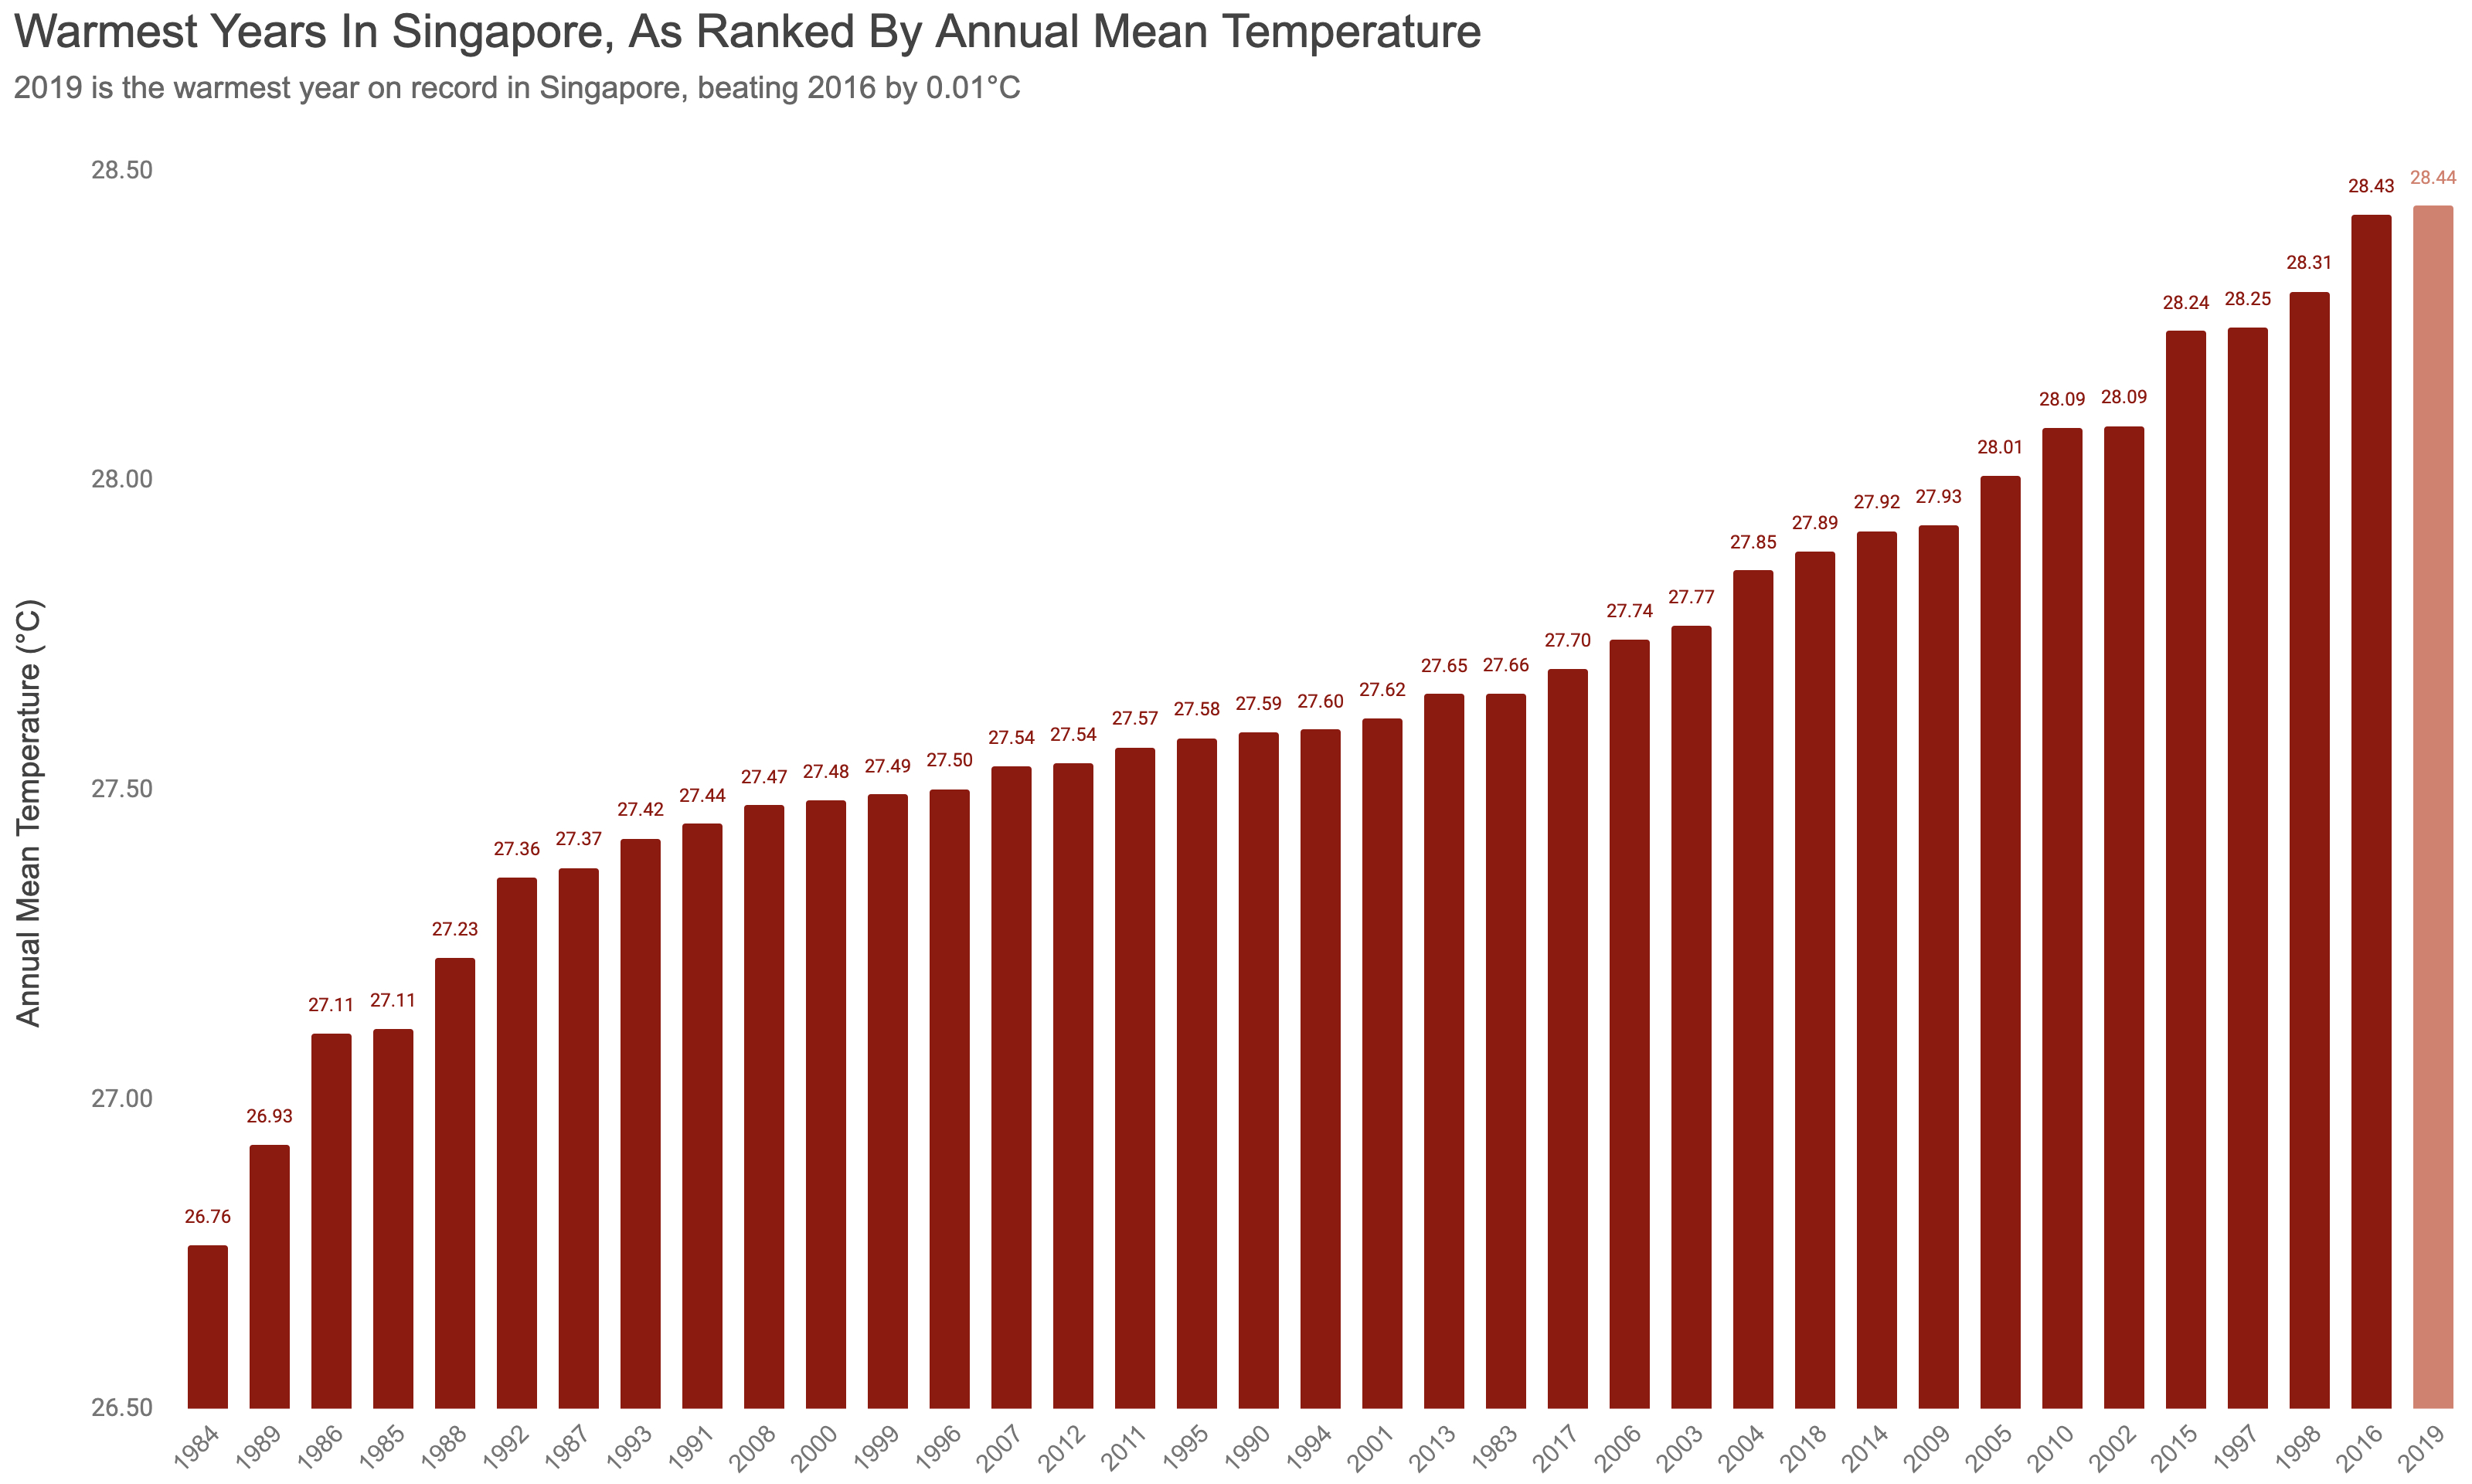

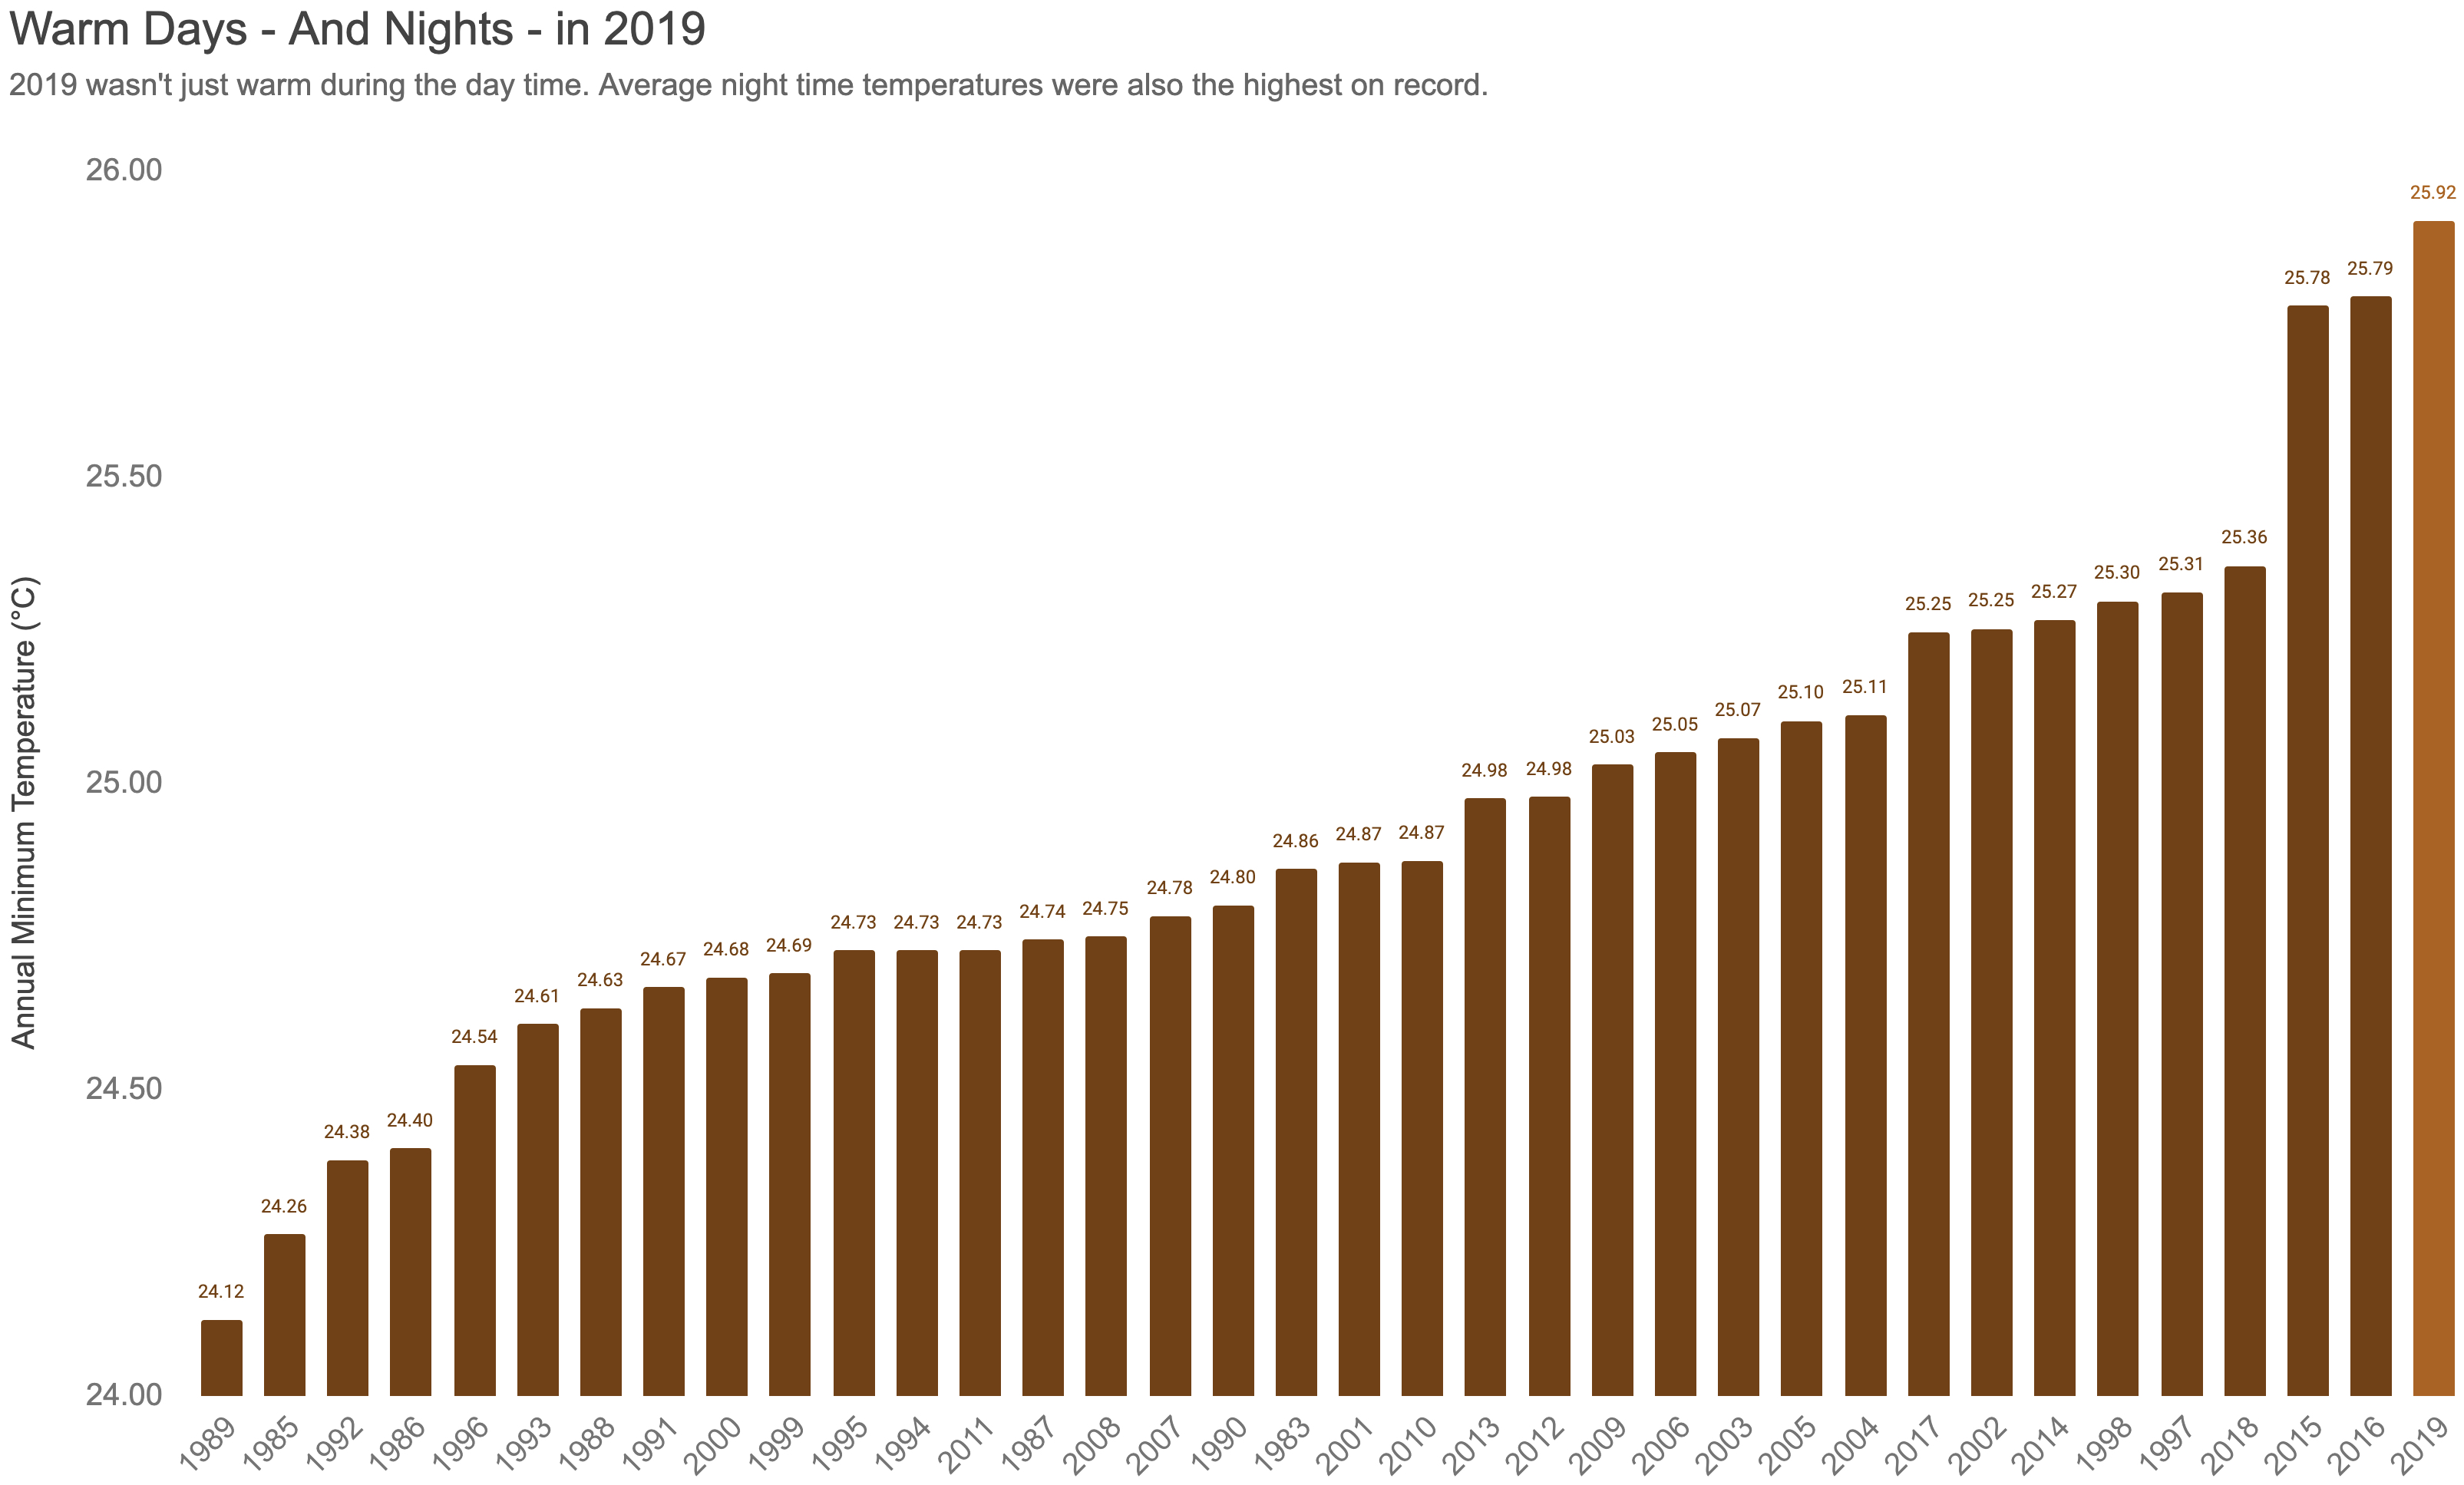

## 1.4 LINE CHART RACE

The 2 charts above can also be summarised via a decent line chart race. I used Flourish's excellent online tool to create the chart below. Follow the link under the chart for the animated version.

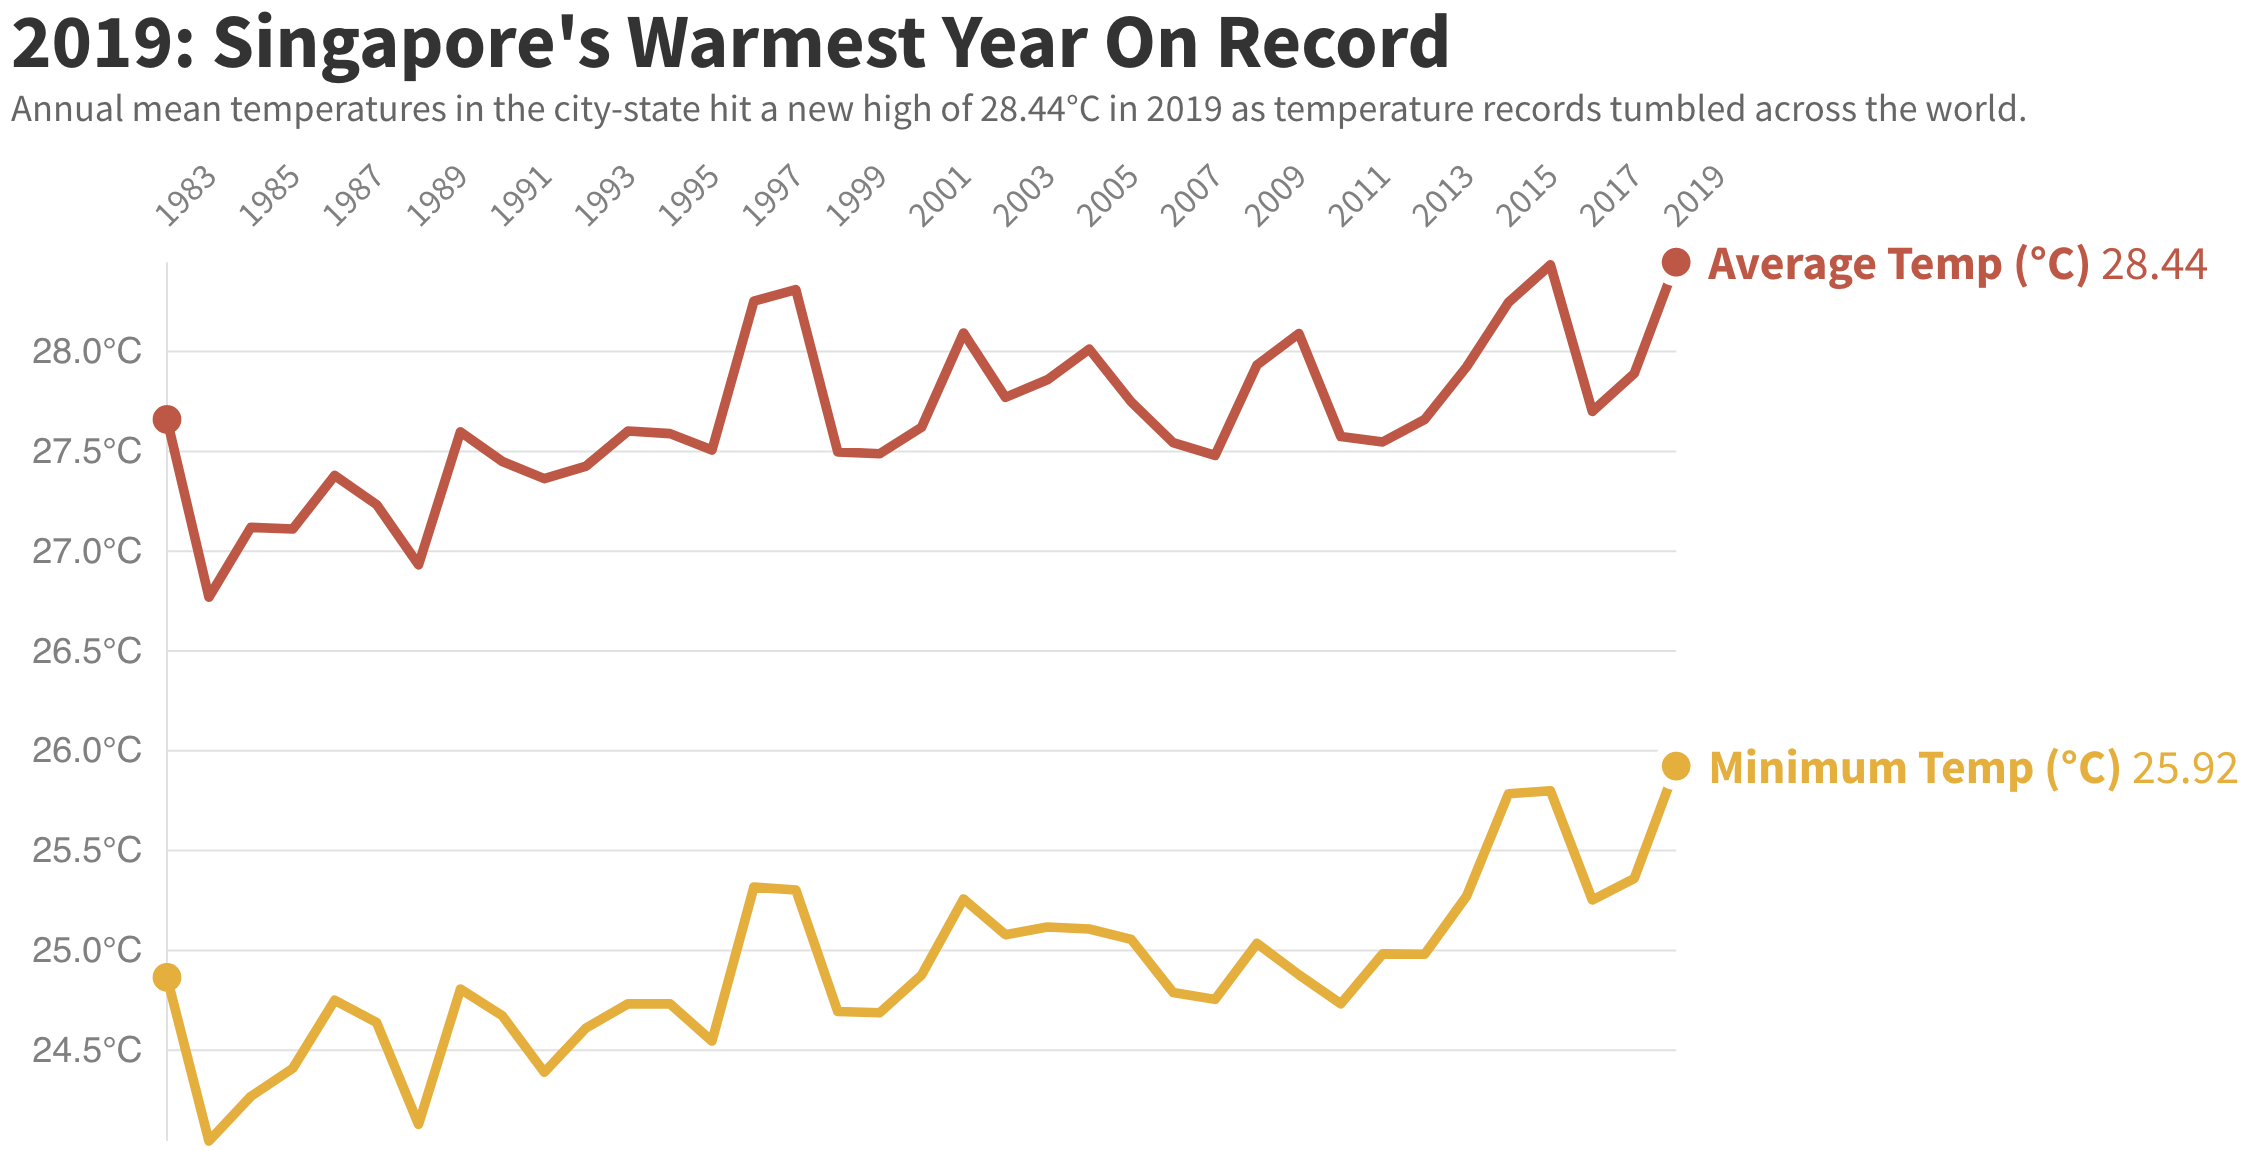

[Flourish Chart](https://public.flourish.studio/visualisation/1236402/)

## 1.5 2019: 3RD DRIEST YEAR ON RECORD

Unsurprisingly, 2019 was also one of the driest years on record. Singapore's Changi climate station recorded just 1,367.5 mm of rain for the whole year in 2019.

This amount is 37% below the 1981–2010 long-term average, and makes 2019 the third driest year ever recorded since 1869, according to the NEA.

The chart below was again made with Google Sheets, for aforementioned reasons.

In [10]:
rain_annual = (
    weather.groupby("Year")["Daily Rainfall Total (mm)"].sum()
)

rain_annual = pd.DataFrame(
    rain_annual.reset_index().rename(
        columns={"index": "Year", 0: "Total Annual Rainfall (mm)"}
    )
)

rain_annual.columns = ["Year", "Total Annual Rainfall (mm)"]

In [11]:
rain_annual.sort_values(by="Total Annual Rainfall (mm)")

Year  Total Annual Rainfall (mm)
14  1997                      1118.9
32  2015                      1266.8
36  2019                      1367.5
2   1985                      1483.9
7   1990                      1523.8
31  2014                      1538.4
35  2018                      1708.2
19  2002                      1748.9
0   1983                      1866.5
8   1991                      1877.0
26  2009                      1920.9
22  2005                      1930.7
11  1994                      1941.8
33  2016                      1956.5
34  2017                      2054.6
27  2010                      2075.1
4   1987                      2102.8
16  1999                      2134.0
21  2004                      2136.4
29  2012                      2159.9
10  1993                      2168.7
9   1992                      2260.8
25  2008                      2325.1
12  1995                      2332.6
17  2000                      2370.5
20  2003                      2391.2
13  1996                      2418.0
6   1989                      2469.3
28  2011                      2524.2
3   1986                      2536.1
5   1988                      2598.6
15  1998                      2623.1
1   1984                      2686.7
30  2013                      2748.4
23  2006                      2753.2
18  2001                      2783.1
24  2007                      2886.2

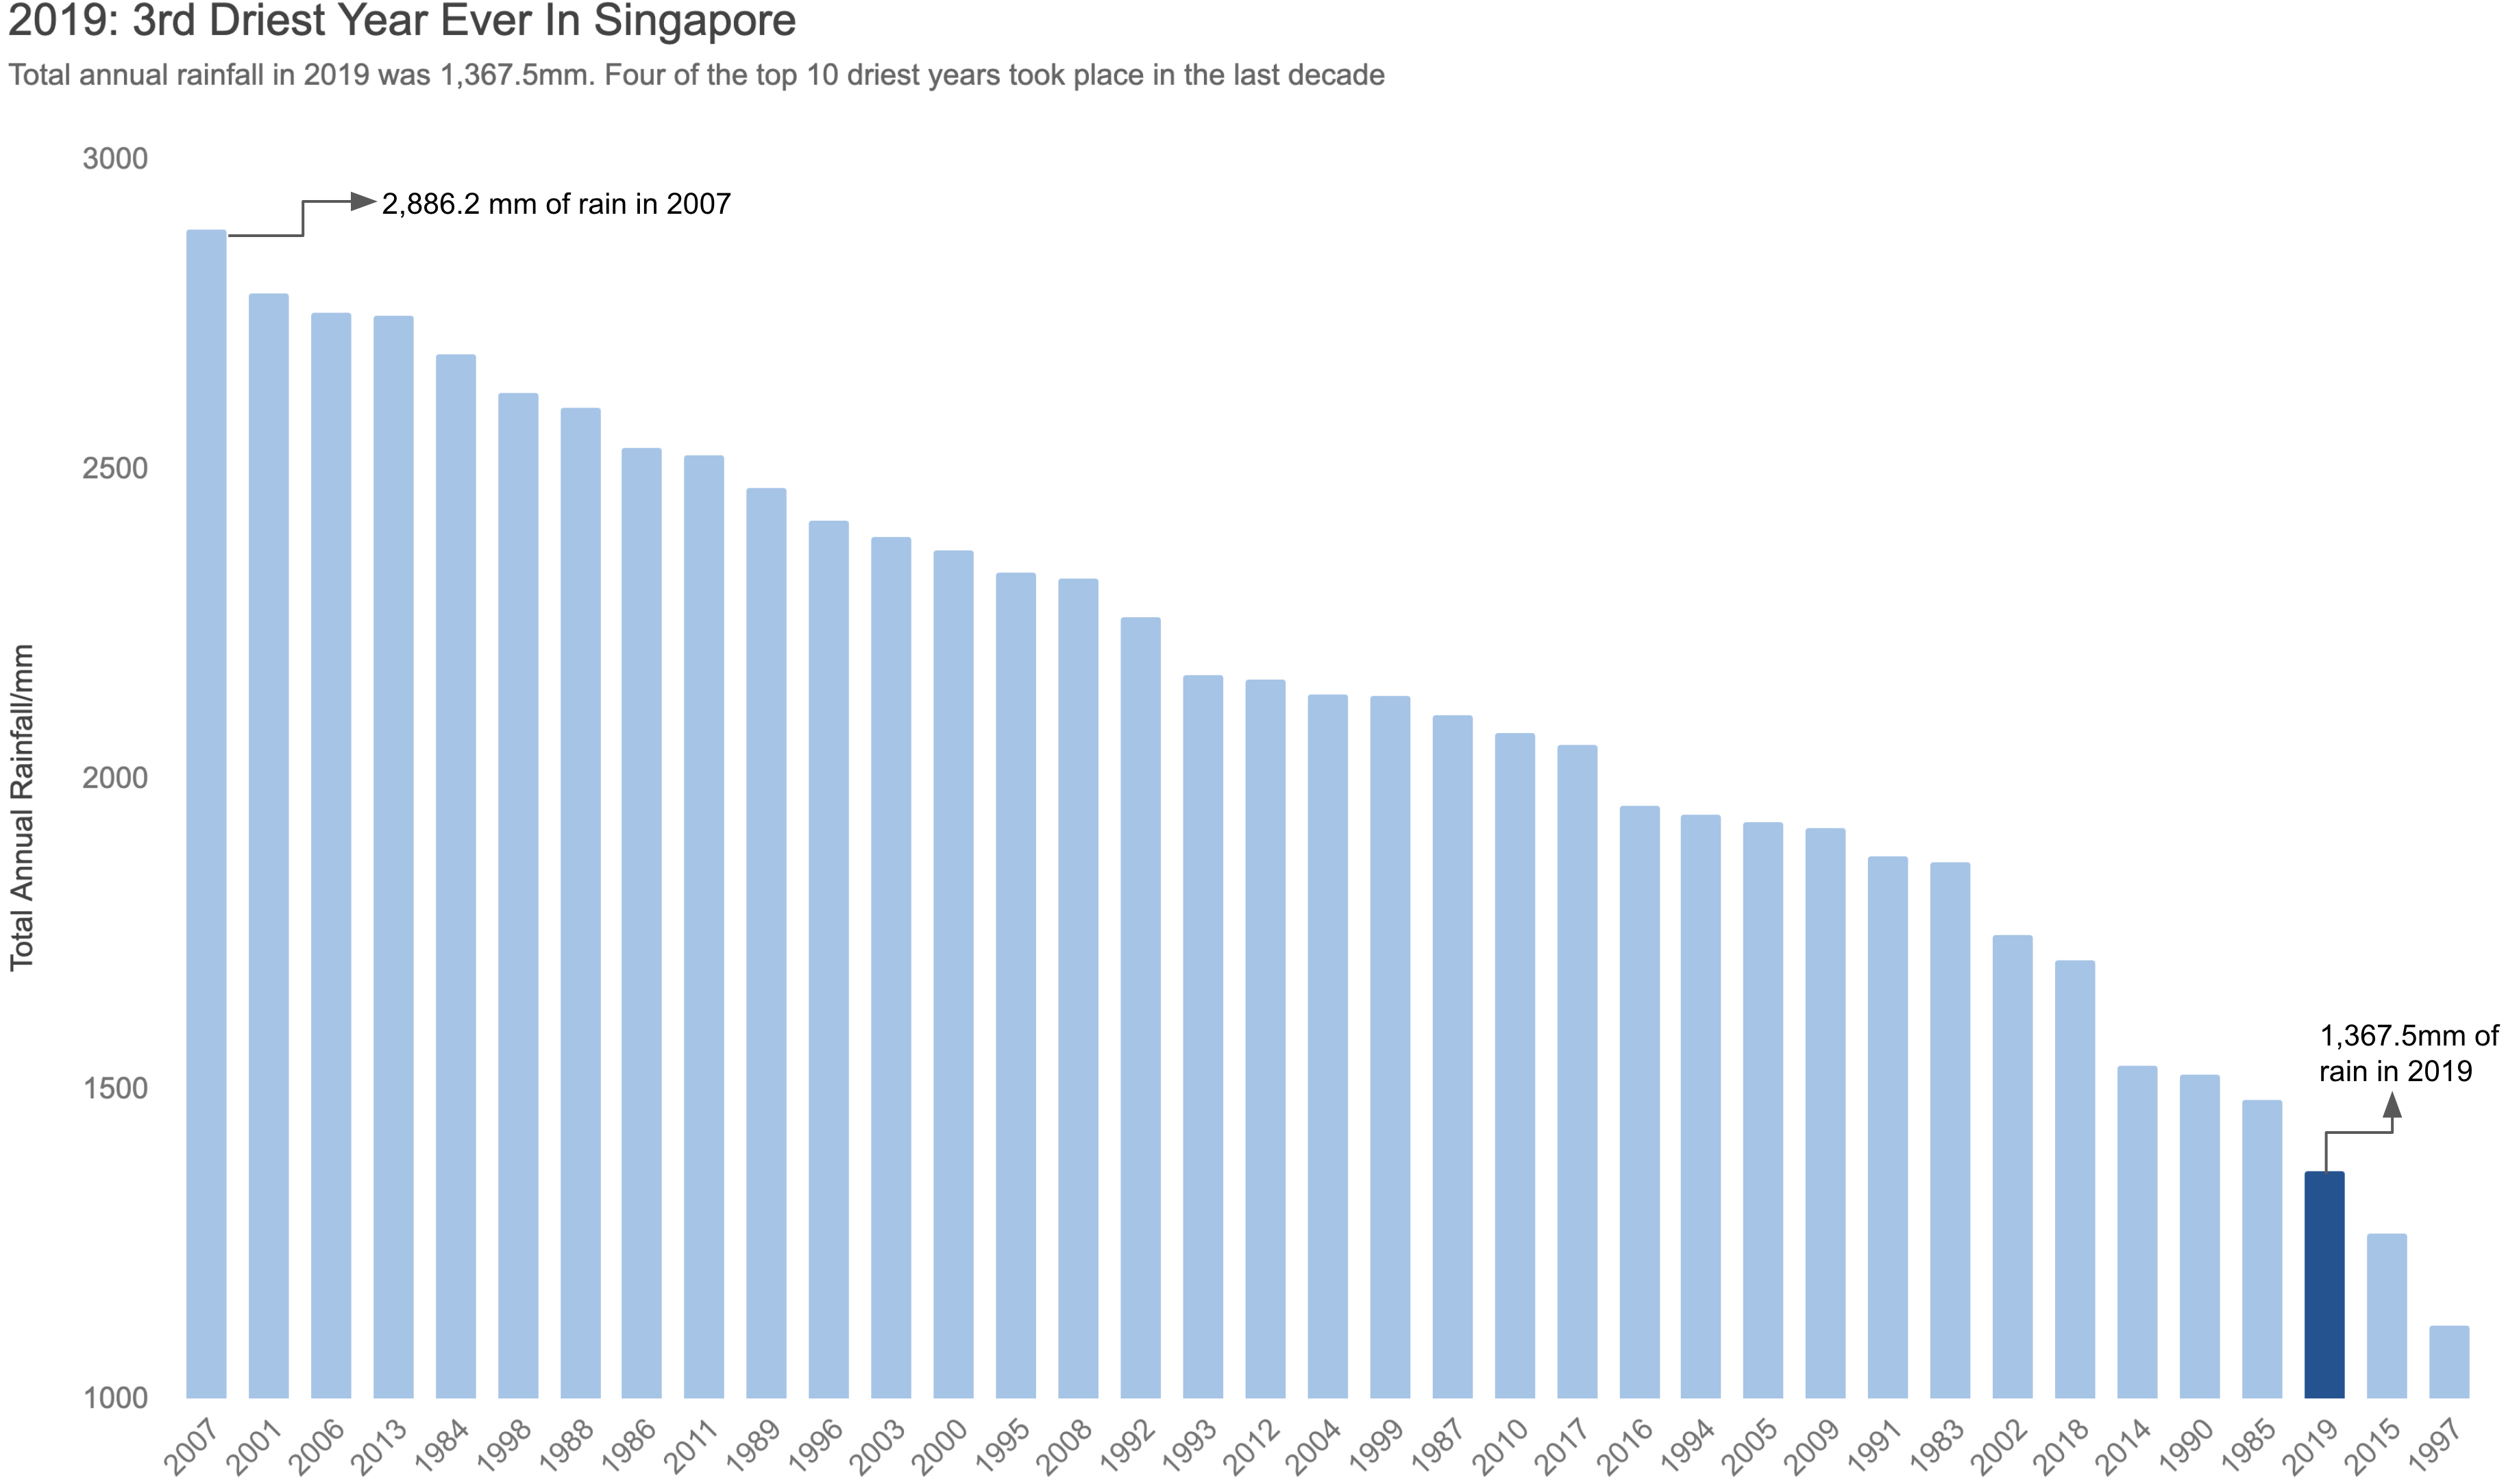

# 2. COMPARISONS ACROSS DECADES

The average temperature for the decade 2010–2019 was 27.95°C, surpassing 2000–2009's 27.75°C and 1990–1999's 27.65°C. But it is easier to discern the changes by charting the annual weather patterns at a 10-year interval, ie, compare 2019's weather data with those in 2009, 1999, and 1989..

In [12]:
decade2010s = weather[weather["Year"] >= 2010] # years 2010 - 2019

decade2000s = weather[(weather["Year"] >= 2000) & (weather["Year"] < 2010)] # years 2000 - 2009

decade1990s = weather[(weather["Year"] >= 1990) & (weather["Year"] < 2000)] # years 1990 - 1999

In [13]:
decade2010s["Mean Temperature (°C)"].mean(), decade2000s[
    "Mean Temperature (°C)"
].mean(), decade1990s["Mean Temperature (°C)"].mean()


(27.94646768893753, 27.7496851902545, 27.654490690032837)

## 2.1 AVERAGE MONTHLY TEMPERATURES IN 2019 COMPARED TO 2009, 1999, 1989

In [14]:
compare = weather[
    (weather["Year"] == 2019)
    | (weather["Year"] == 2009)
    | (weather["Year"] == 1999)
    | (weather["Year"] == 1989)
]

In [15]:
compare.to_csv('../data/compare_2019_1989.csv', index=False)

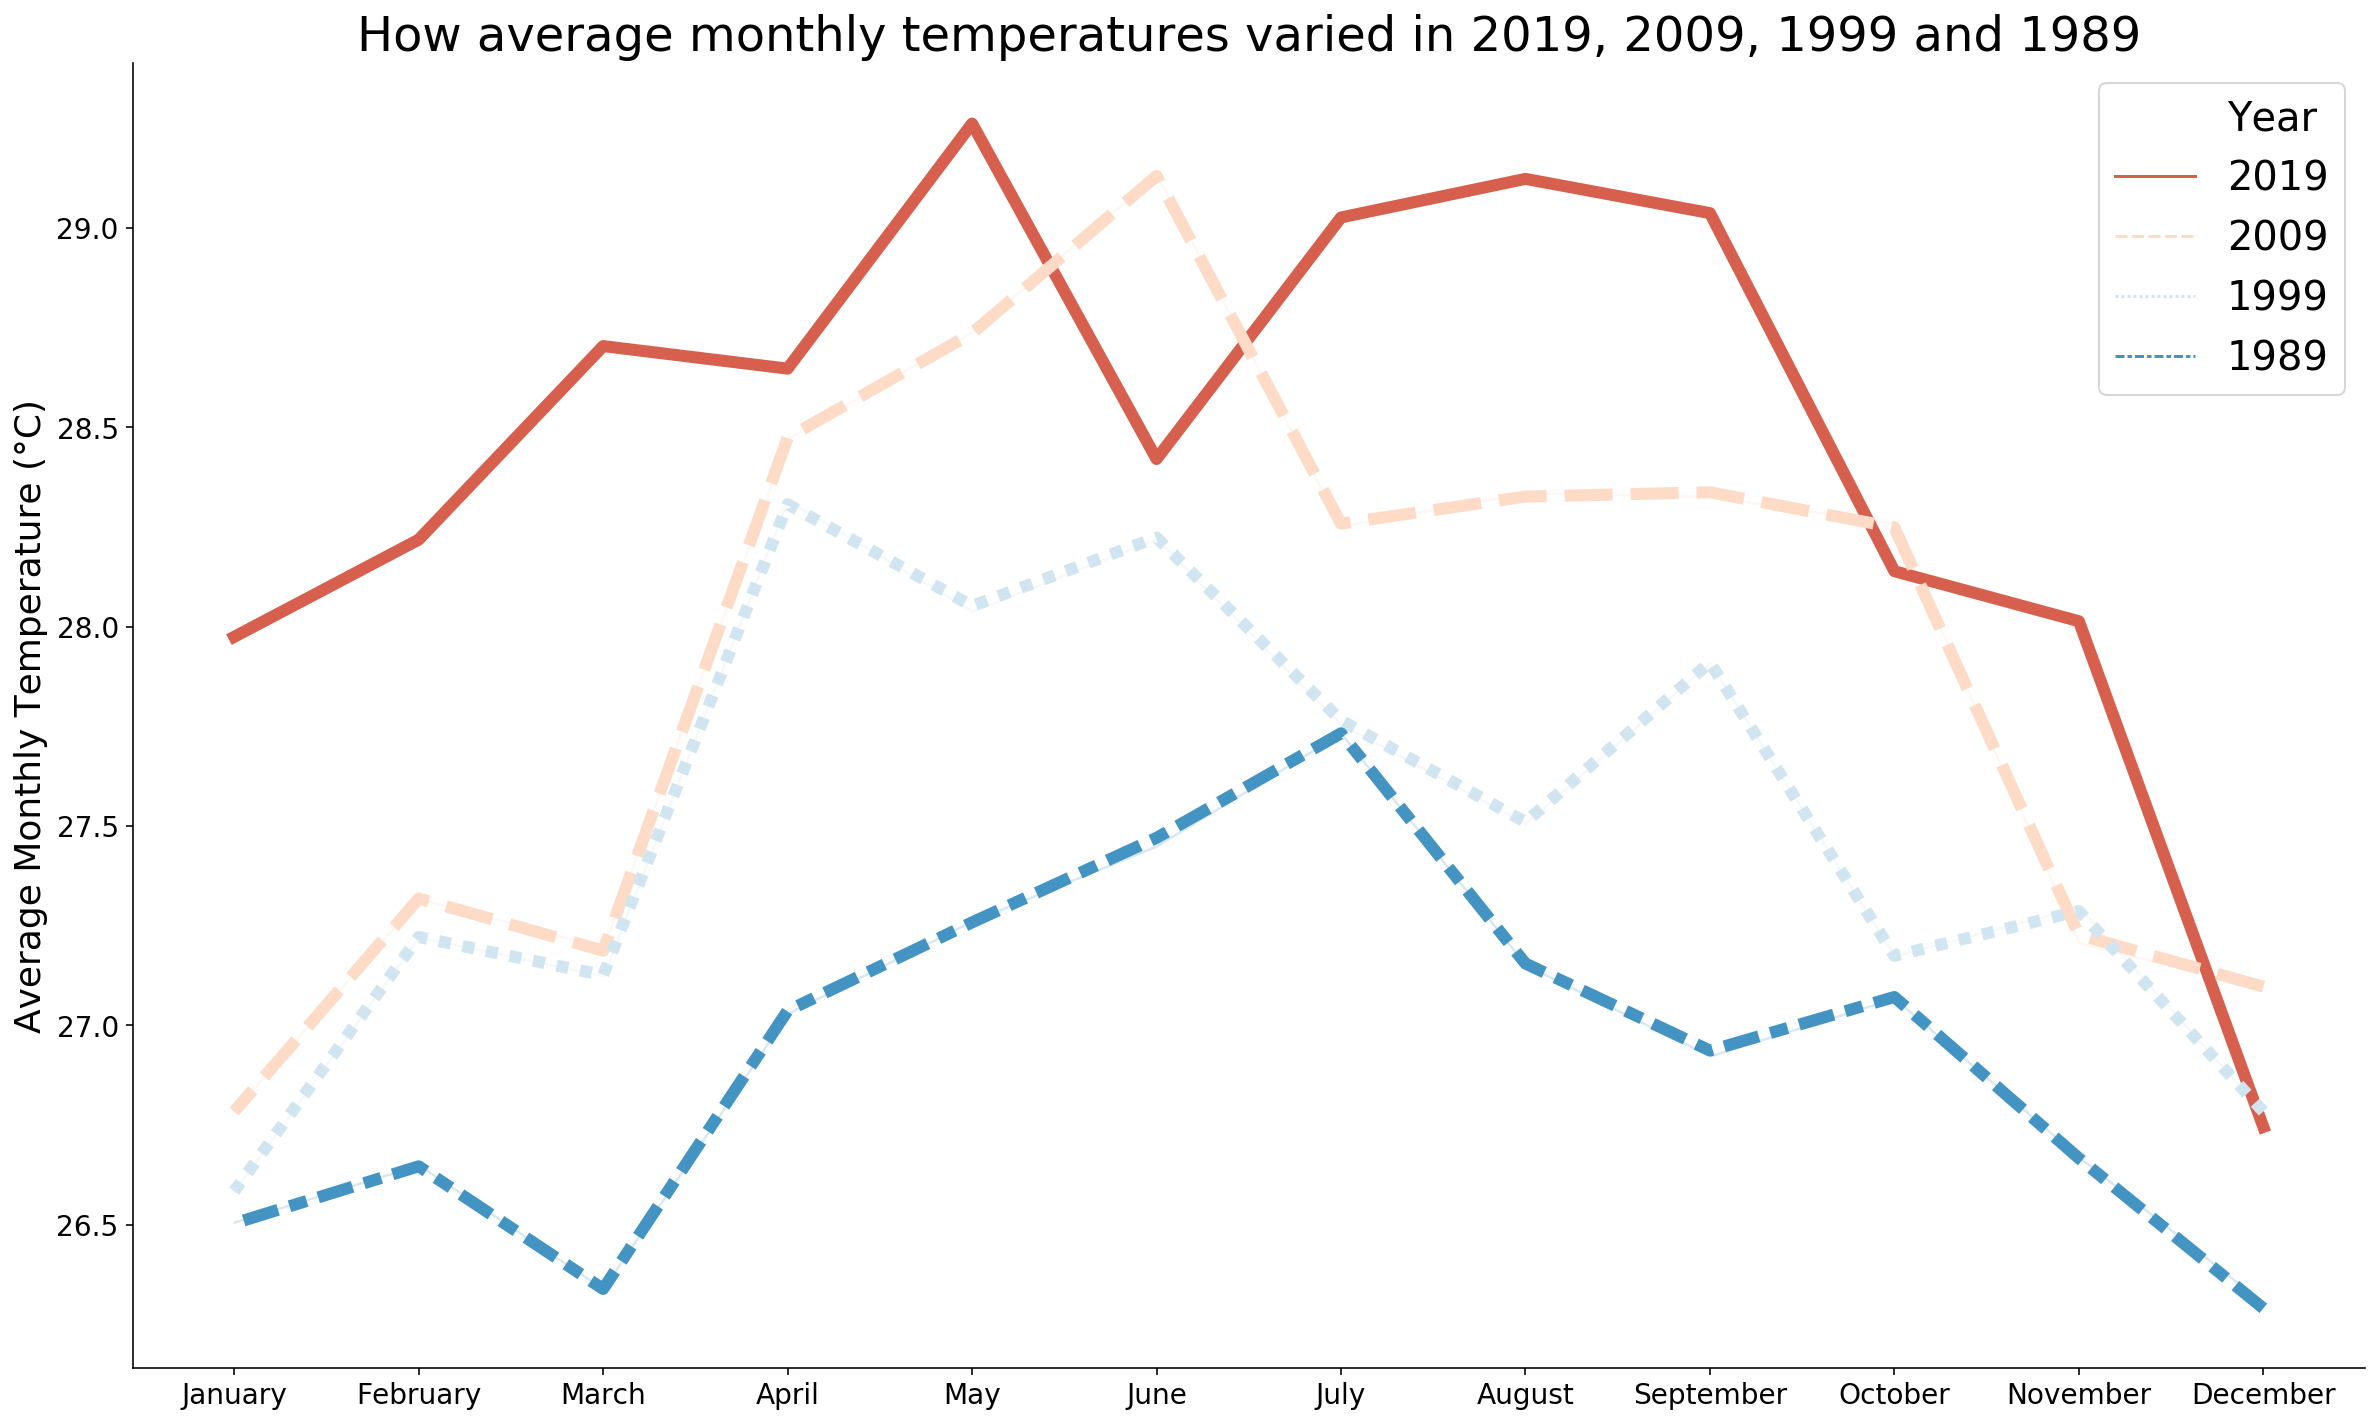

In [16]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(
    x="Month_Name",
    y="Mean Temperature (°C)",
    linewidth=6,
    data=compare,
    hue="Year",
    hue_order=[2019, 2009, 1999, 1989],
    style="Year",
    style_order=[2019, 2009, 1999, 1989],
    legend="full",
    ci=False,
    sort=False,
    palette=sns.color_palette("RdBu", 4),
)

plt.title(
    "How average monthly temperatures varied in 2019, 2009, 1999 and 1989",
    fontsize=24,
)

ax.invert_xaxis()

plt.xlabel("")
plt.ylabel("Average Monthly Temperature (°C)", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()

plt.legend(fontsize=20, loc="best")

plt.show()

## ANALYSIS:
The bold red line shows how average monthly temperatures in 2019 have generally surpassed those at similar points in 2009, 1999 and 1989, with a few exceptions such as June 2009.

Other striking trends include:
* The huge jump in average temperature for January, from 26.5°C in 1989 to 27.97 in 2019, a rise of 1.47°C.

* In the years 1989, 1999 and 2009, the average monthly temperatures started to dip after the familiar June-July spikes. But in 2019, the monthly temperatures bucked the mid-year trend and instead rose to sharp new highs for the July-September period. The average monthly temperatures for August and September 2019 - respectively 29.12°C and 29.03°C - were the highest ever in Singapore for those months.

## 2.2 MONTHLY RAINFALL COMPARISON FOR 2019, 2009, 1999, 1989

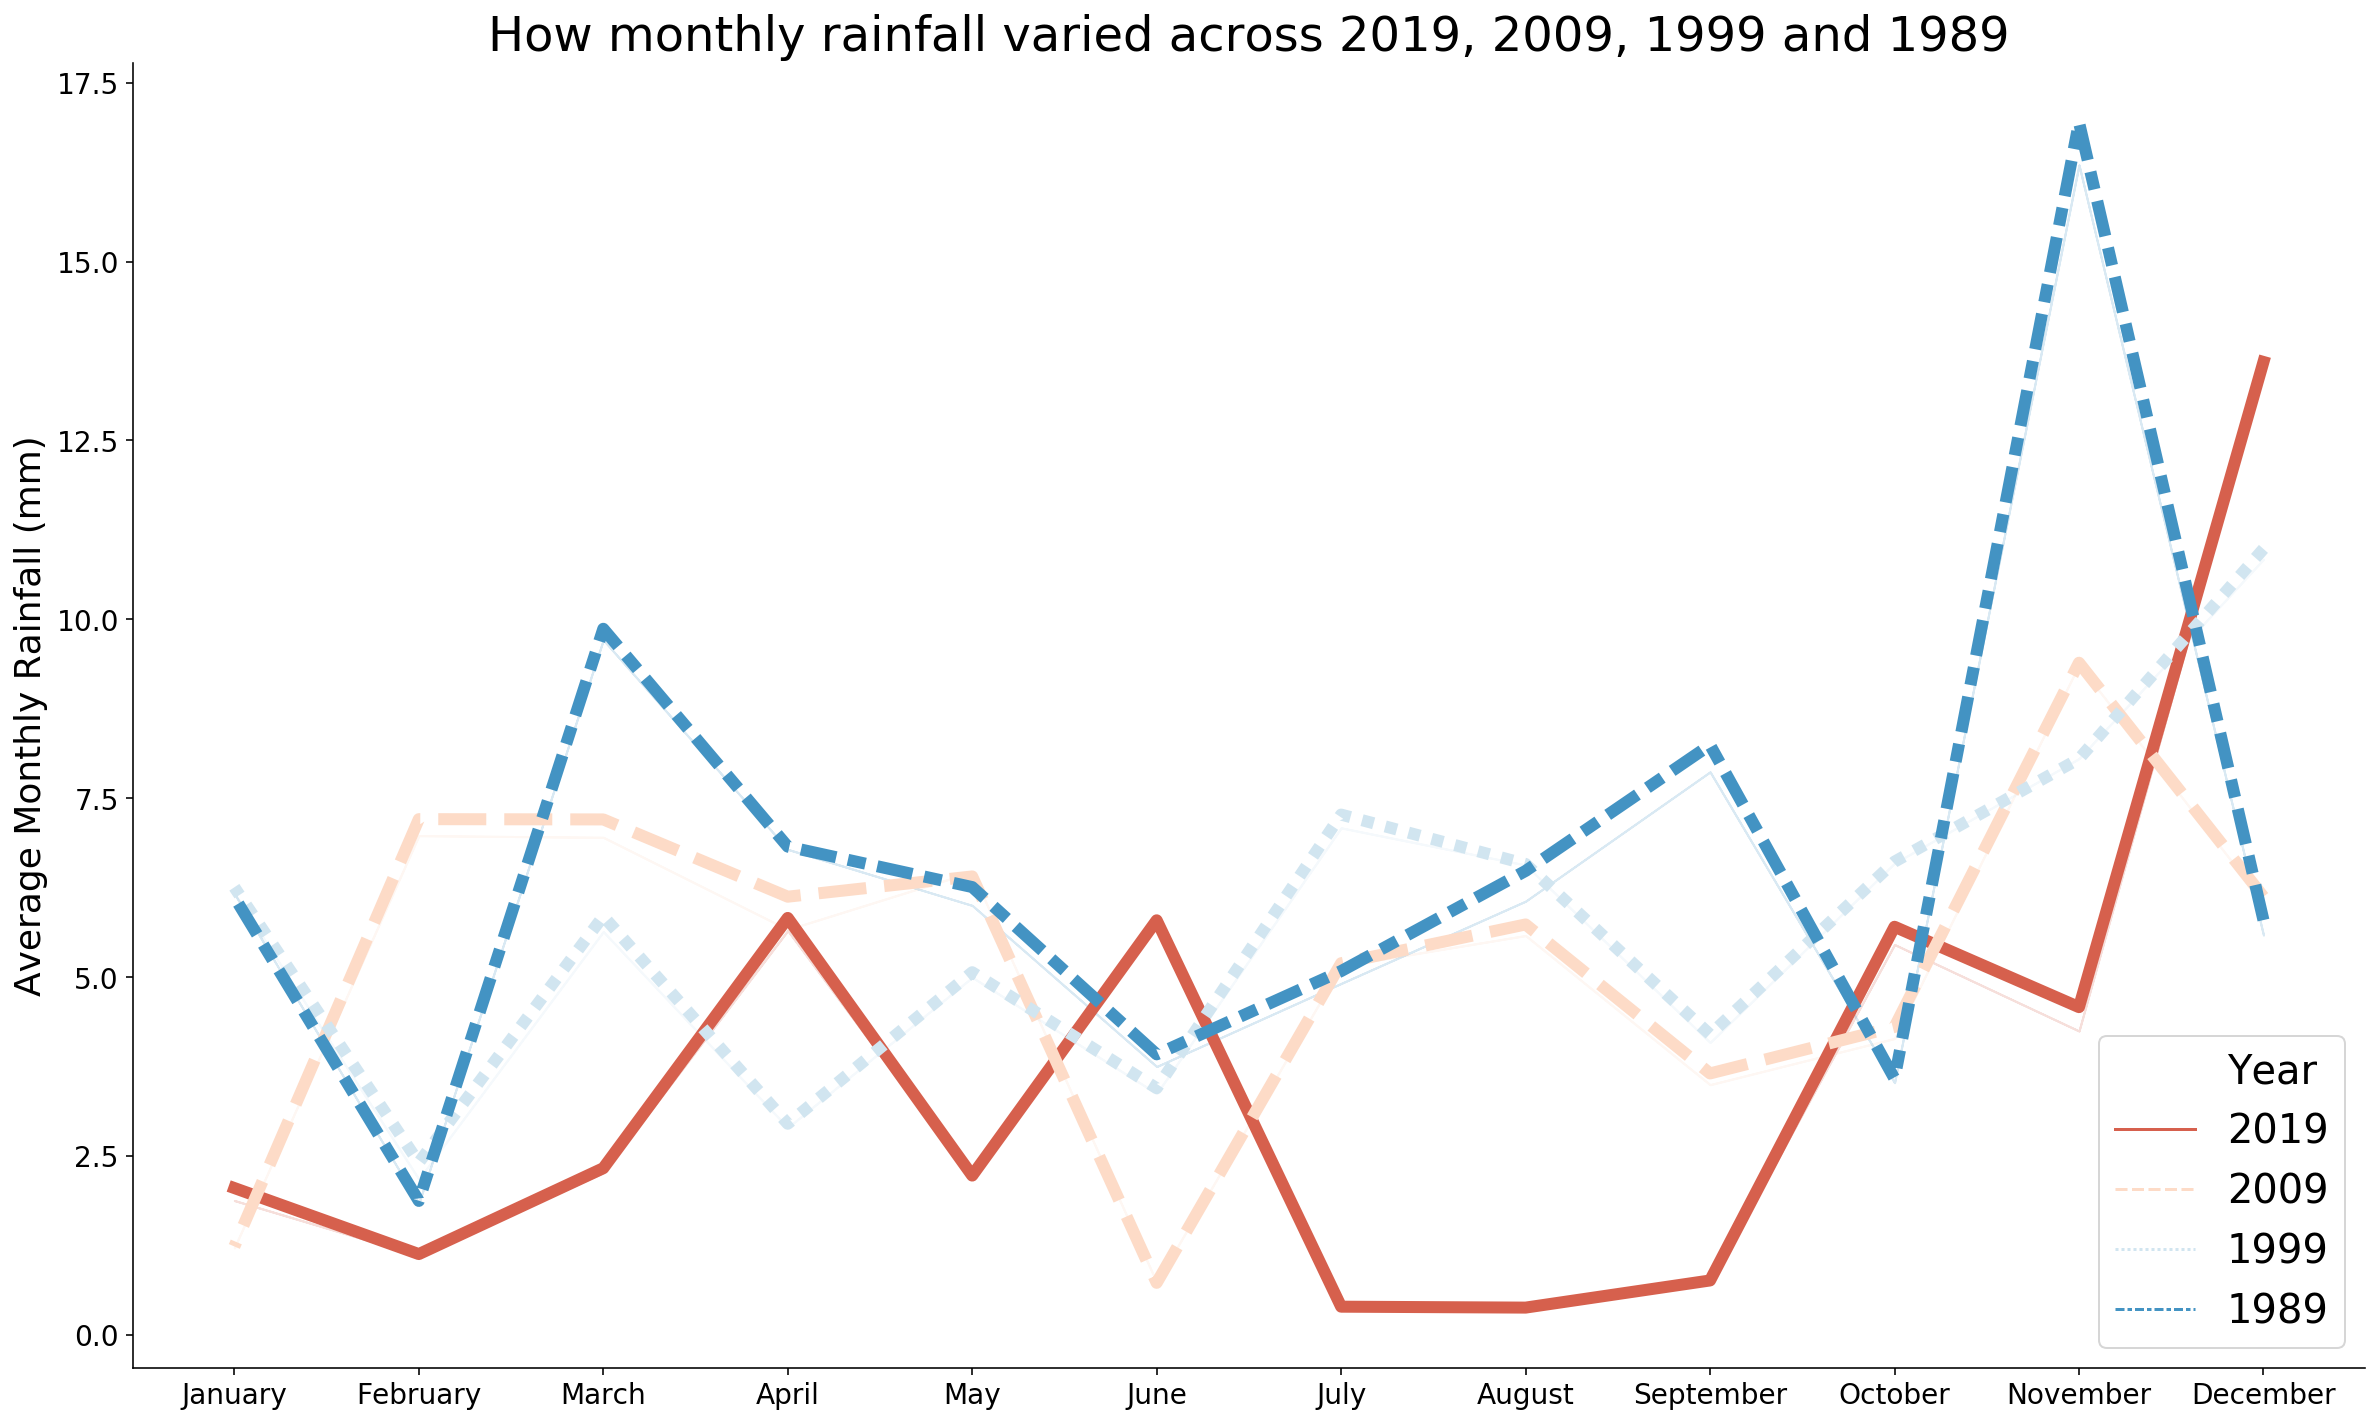

In [17]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(
    x="Month_Name",
    y="Daily Rainfall Total (mm)",
    linewidth=6,
    data=compare,
    hue="Year",
    hue_order=[2019, 2009, 1999, 1989],
    style="Year",
    style_order=[2019, 2009, 1999, 1989],
    legend="full",
    ci=False,
    sort=False,
    palette=sns.color_palette("RdBu", 4),
)

plt.title(
    "How monthly rainfall varied across 2019, 2009, 1999 and 1989",
    fontsize=24,
)

plt.xlabel("", fontsize=18)
plt.ylabel("Average Monthly Rainfall (mm)", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

sns.despine()
ax.invert_xaxis()

plt.legend(fontsize=20, loc="lower right")

plt.show()

## ANALYSIS:
In plotting a similar chart for rainfall instead of average temperature, we can see a similar bucking of the mid-year trends. In the years 1989, 1999 and 2009, total monthly rainfall tended to pick up after June, when the Southwest Monsoon arrives.

But in 2019, monthly rainfall fell to new lows for the months of July to September. December 2019 was the rainiest of the four years being compared, but that late surge was not enough to compensate for the other drier months in the year. As we saw in Chart 3, 2019 is the third driest year in Singapore ever.